In [2]:
import numpy as np
from lab2_tools import *
import matplotlib.pyplot as plt
from prondict import *

In [2]:
a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
c = np.concatenate((a, b))
c

array([1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
d = np.vstack((a, b))
d

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [4]:
def test(h1, h2):
    M = h1.shape[0]
    N = h2.shape[0]
    K = M + N - 1 
    h3 = [1,2,3,4]
    
    # compute transition prob
    result = np.zeros([K,K])
    result[:M,:M] = h1
    result[M-1:,M-1:] = h2
    result[:M-1,M-1:] = np.outer(h1[:M-1,-1],h3)
    result[-1,-1] = 1
    
    return result

In [5]:
q = np.array([[1,2,3,4],[5,6,7,8],[9,1,2,3],[4,5,6,7]])
w = np.array([[1,2,3,4],[5,6,7,8],[1,2,3,4],[0,0,0,8]])

In [6]:
test1 = test (q,w)
test1

array([[ 1.,  2.,  3.,  4.,  8., 12., 16.],
       [ 5.,  6.,  7.,  8., 16., 24., 32.],
       [ 9.,  1.,  2.,  3.,  6.,  9., 12.],
       [ 4.,  5.,  6.,  1.,  2.,  3.,  4.],
       [ 0.,  0.,  0.,  5.,  6.,  7.,  8.],
       [ 0.,  0.,  0.,  1.,  2.,  3.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [7]:
def concatTwoHMMs(hmm1, hmm2):
    result_hmm = dict()
    M = hmm1["transmat"].shape[0]
    N = hmm2["transmat"].shape[0]
    K = M + N - 1 
    
    # concatenate priori/start probability 
    sp_1 = hmm1["startprob"][:(M-1)]
    sp_2 = hmm1["startprob"][(M-1)]*hmm2["startprob"]
    result_hmm["startprob"] = np.concatenate((sp_1, sp_2))
    
    # compute transition prob
    result_hmm["transmat"] = np.zeros([K,K])
    result_hmm["transmat"][:M,:M] = hmm1["transmat"]
    result_hmm["transmat"][M-1:,M-1:] = hmm2["transmat"]
    result_hmm["transmat"][:M-1,M-1:] = np.outer(hmm1["transmat"][:M-1,-1],hmm2["startprob"])
    result_hmm["transmat"][-1,-1] = 1
    
    # concatenate means

    result_hmm["means"] = np.vstack((hmm1["means"], hmm2["means"]))

    # concatenate variances

    result_hmm["covars"] = np.vstack((hmm1["covars"], hmm2["covars"]))

    # concatenate names

    result_hmm["name"] = hmm1["name"] + ", " + hmm2["name"]

    return result_hmm

In [8]:
def concatHMMs(hmmmodels, namelist):
    concat = hmmmodels[namelist[0]]
    for idx in range(1,len(namelist)):
        concat = concatTwoHMMs(concat, hmmmodels[namelist[idx]])
    return concat

In [9]:
isolated = {}
for digit in prondict.keys():
    isolated[digit] = ['sil'] + prondict[digit] + ['sil']
isolated

{'o': ['sil', 'ow', 'sil'],
 'z': ['sil', 'z', 'iy', 'r', 'ow', 'sil'],
 '1': ['sil', 'w', 'ah', 'n', 'sil'],
 '2': ['sil', 't', 'uw', 'sil'],
 '3': ['sil', 'th', 'r', 'iy', 'sil'],
 '4': ['sil', 'f', 'ao', 'r', 'sil'],
 '5': ['sil', 'f', 'ay', 'v', 'sil'],
 '6': ['sil', 's', 'ih', 'k', 's', 'sil'],
 '7': ['sil', 's', 'eh', 'v', 'ah', 'n', 'sil'],
 '8': ['sil', 'ey', 't', 'sil'],
 '9': ['sil', 'n', 'ay', 'n', 'sil']}

In [10]:
phoneHMMs = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
phoneHMMs

{'f': {'name': 'f',
  'startprob': array([1., 0., 0., 0.]),
  'transmat': array([[0.8437548, 0.1562452, 0.       , 0.       ],
         [0.       , 0.7090222, 0.2909778, 0.       ],
         [0.       , 0.       , 0.3064214, 0.6935785],
         [0.       , 0.       , 0.       , 1.       ]]),
  'means': array([[ 3.223918e+02, -2.714506e+02, -1.279559e+02,  4.936052e+01,
          -1.980236e+00, -9.977302e+00, -2.686330e+01, -4.009798e+01,
           3.357593e-01, -7.339875e+01,  2.645822e+01, -6.140060e+01,
           3.153127e+01],
         [ 4.886330e+02, -2.018883e+02, -1.998543e+02, -3.249403e+00,
          -1.454704e+01, -1.020947e+01, -5.742544e+01, -1.035629e+02,
          -2.134682e+01, -9.308153e+01,  2.632338e+01, -8.978764e+01,
           2.653858e+01],
         [ 5.815154e+02,  2.457827e+02,  2.437778e+01, -5.956849e+01,
          -1.490782e+02,  6.251358e+01, -1.867431e+01, -4.977795e+01,
           7.758113e+00,  1.062016e+02,  1.829358e+01,  2.677407e+01,
           1.66

In [67]:
len(phoneHMMs)

21

In [64]:
wordHMMs = {}
for key in isolated.keys():
    wordHMMs[key] = concatHMMs(phoneHMMs, isolated[key])
    
len(wordHMMs)

11

In [12]:
example = np.load('lab2_example.npz', allow_pickle=True)['example'].item() 

In [13]:
list(example.keys()) 

['filename',
 'samplingrate',
 'gender',
 'speaker',
 'digit',
 'repetition',
 'samples',
 'lmfcc',
 'obsloglik',
 'logalpha',
 'loglik',
 'vloglik',
 'vpath',
 'logbeta',
 'loggamma']

In [14]:
example['gender']

'woman'

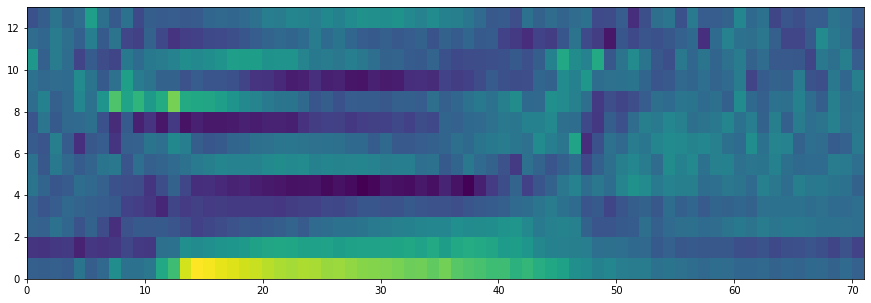

In [15]:
plt.figure(figsize=(15,5))
plt.pcolormesh(example['lmfcc'].T)

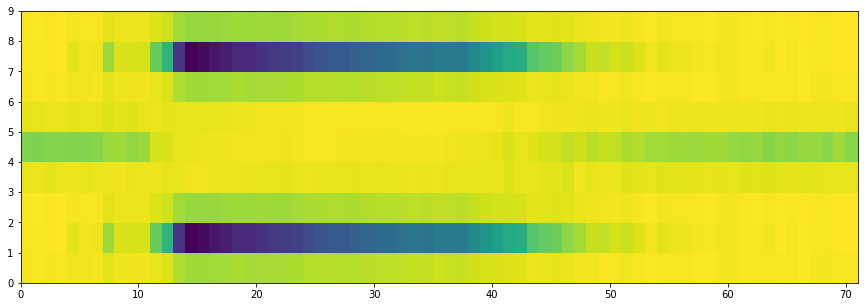

In [16]:
log1 = log_multivariate_normal_density_diag(example['lmfcc'], wordHMMs['o']['means'], wordHMMs['o']['covars'])
plt.figure(figsize=(15,5))
plt.pcolormesh(log1.T)

In [17]:
def forward(log_emlik, log_startprob, log_transmat):
    N = log_emlik.shape[0]
    M = log_emlik.shape[1]
    forward_prob = np.zeros(log_emlik.shape)

    forward_prob[0, :] = log_startprob[:-1] + log_emlik[0, :]

    for n in range(1, N):
        for j in range(M):
            forward_prob[n, j] = logsumexp(forward_prob[n-1, :] + log_transmat[:-1, j]) + log_emlik[n, j]

    return forward_prob

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


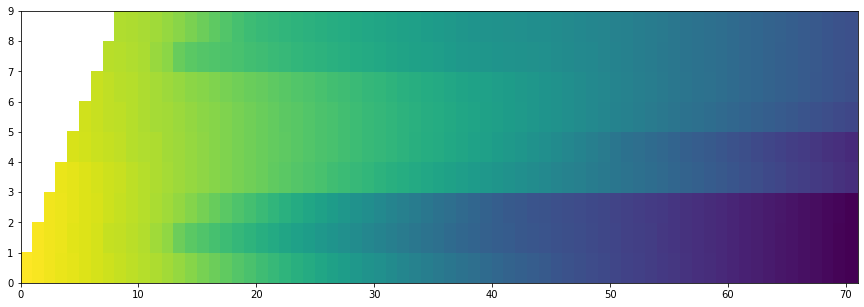

In [18]:
forward1 = forward(example['obsloglik'], np.log(wordHMMs['o']["startprob"]), np.log(wordHMMs['o']["transmat"]))
plt.figure(figsize=(15,5))
plt.pcolormesh(forward1.T)

In [3]:
data = np.load('lab2_data.npz', allow_pickle=True)['data']

In [4]:
len(data)

44

In [54]:
scores = np.zeros((44, 11))
for i in range(len(data)):
    data_ = data[i]["lmfcc"]

    j = 0
    for key, HMM in wordHMMs.items():
        data_log_lik = log_multivariate_normal_density_diag(
                data_, HMM["means"], HMM["covars"])
        fw = forward(data_log_lik,
                np.log(HMM["startprob"]),
                np.log(HMM["transmat"]))
        scores[i, j] = logsumexp(fw[-1, :])
        j += 1


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


[ 0  0  1  1  4 10  4  3  4  4  5  5  4  4  7  7  4  4  4  4 10  1  0  0
  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


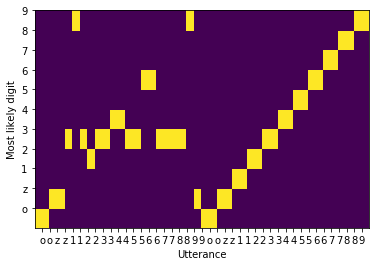

In [57]:
labels_hmm = []
labels_utterances = []
for k in wordHMMs.keys():
    labels_hmm.append(k)
    
for d in data:
    labels_utterances.append(d["digit"])

assignments = np.zeros((44, 11))

ass_index = np.argmax(scores, axis=1)
print(ass_index)

for i in range(44):
    assignments[i,ass_index[i]] = 1

plt.pcolormesh(assignments.T)
plt.ylabel("Most likely digit")
plt.yticks(range(1,12), labels=labels_hmm)
plt.xlabel("Utterance")
plt.xticks(range(1,44), labels=labels_utterances)
plt.show()

In [59]:
# repeat with all models

phoneHMMsall = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()
wordHMMsall = {}
for key in isolated.keys():
    wordHMMsall[key] = concatHMMs(phoneHMMsall, isolated[key])

In [77]:
phoneHMMsall

{'f': {'name': 'f',
  'startprob': array([1., 0., 0., 0.]),
  'transmat': array([[0.8074276, 0.1925724, 0.       , 0.       ],
         [0.       , 0.7835307, 0.2164693, 0.       ],
         [0.       , 0.       , 0.4751177, 0.5248824],
         [0.       , 0.       , 0.       , 1.       ]]),
  'means': array([[ 3.756838e+02, -1.892536e+02, -9.660455e+01,  4.465488e+01,
           2.823588e+01, -4.992766e-01,  4.529542e-02, -2.909808e+01,
           1.526023e+01, -3.026565e+01,  2.106727e+01, -3.956148e+01,
           2.572369e+01],
         [ 5.441120e+02, -1.801021e+02, -1.472212e+02, -1.085416e+01,
          -2.093026e+01, -1.813961e+01, -1.523612e+01, -5.690070e+01,
          -1.829125e+01, -4.970216e+01,  9.754507e+00, -5.453812e+01,
           1.968687e+01],
         [ 7.118344e+02,  2.438120e+02, -5.496016e+01,  8.645602e+00,
          -1.945088e+02,  3.470830e+01,  3.832467e+01, -7.212926e+00,
          -4.773862e+01, -2.433857e+01,  1.006693e+02, -2.232076e+01,
           7.65

In [65]:
len(wordHMMsall)

11

In [60]:
scores = np.zeros((44, 11))
for i in range(len(data)):
    data_ = data[i]["lmfcc"]

    j = 0
    for key, HMM in wordHMMsall.items():
        data_log_lik = log_multivariate_normal_density_diag(
                data_, HMM["means"], HMM["covars"])
        fw = forward(data_log_lik,
                np.log(HMM["startprob"]),
                np.log(HMM["transmat"]))
        scores[i, j] = logsumexp(fw[-1, :])
        j += 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10  0  0
  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9  2 10]


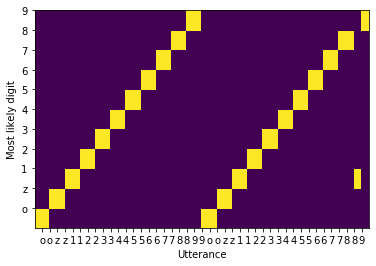

In [66]:
labels_hmm = []
labels_utterances = []
for k in wordHMMsall.keys():
    labels_hmm.append(k)
    
for d in data:
    labels_utterances.append(d["digit"])

assignments = np.zeros((44, 11))

ass_index = np.argmax(scores, axis=1)
print(ass_index)

for i in range(44):
    assignments[i,ass_index[i]] = 1

plt.pcolormesh(assignments.T)
plt.ylabel("Most likely digit")
plt.yticks(range(1,12), labels=labels_hmm)
plt.xlabel("Utterance")
plt.xticks(range(1,44), labels=labels_utterances)
plt.show()

In [56]:
def backward(log_emlik, log_startprob, log_transmat):
    N = log_emlik.shape[0]
    M = log_emlik.shape[1]

    backward_prob = np.zeros([N,M])

    for i in reversed(range(N-1)):
        for j in range(M):
            backward_prob[i,j] = logsumexp(log_transmat[j,:-1] + log_emlik[i+1,:] + backward_prob[i+1,:])

    return backward_prob

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


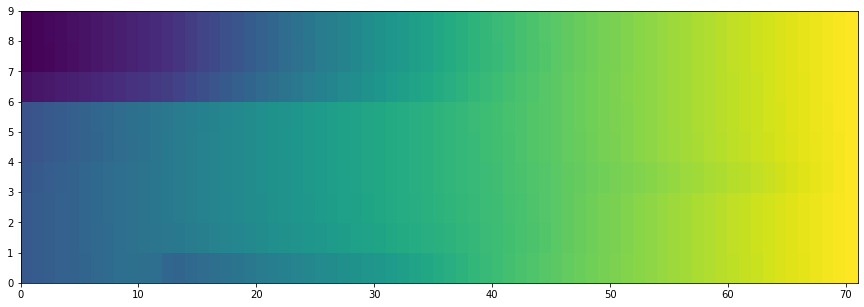

In [20]:
back1 = backward(example['obsloglik'], np.log(wordHMMs['o']["startprob"]), np.log(wordHMMs['o']["transmat"]))
plt.figure(figsize=(15,5))
plt.pcolormesh(back1.T)

In [21]:
def viterbi(log_emlik, log_startprob, log_transmat, forceFinalState=True):
    N = log_emlik.shape[0]
    M = log_emlik.shape[1]

    V = np.zeros(log_emlik.shape)
    B = np.zeros(log_emlik.shape)

    # Initialization
    V[0, :] = log_startprob[:-1] + log_emlik[0, :]
    B[0, :] = 0

    # Induction
    for i in range(1, N):
        for j in range(M):
            V[i, j] = np.max(V[i-1, :] + log_transmat[:-1, j]) + log_emlik[i, j]
            B[i, j] = np.argmax(V[i-1, :] + log_transmat[:-1, j])

    # Termination
    best = np.max(V[-1, :])
    sN = np.argmax(B[-1, :])

    # Backtracking
    st = np.zeros(N)
    st[-1] = sN
    for i in reversed(range(N-1)):
        st[i] = B[i+1, int(st[i+1])]


    viterbi_loglik = best
    viterbi_path = st

    return viterbi_loglik, viterbi_path

In [68]:
scores_viterbi = np.zeros((44, 11))
for i in range(len(data)):
    data_ = data[i]["lmfcc"]

    j = 0
    for key, HMM in wordHMMs.items():
        data_log_lik = log_multivariate_normal_density_diag(
            data_, HMM["means"], HMM["covars"])
        viterbi_loglik, viterbi_path = viterbi(data_log_lik,
            np.log(HMM["startprob"]),
            np.log(HMM["transmat"]))
        scores_viterbi[i, j] = viterbi_loglik
        j += 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


[ 0  0  1  1  4 10  4  3  4  4  5  5  4  4  7  7  4  4  4  4 10  1  0  0
  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


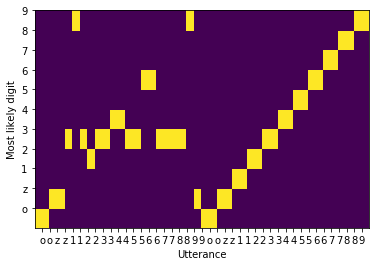

In [69]:
assignments = np.zeros((44, 11))

ass_index = np.argmax(scores_viterbi, axis=1)
print(ass_index)

for i in range(44):
    assignments[i,ass_index[i]] = 1

plt.pcolormesh(assignments.T)
plt.ylabel("Most likely digit")
plt.yticks(range(1,12), labels=labels_hmm)
plt.xlabel("Utterance")
plt.xticks(range(1,44), labels=labels_utterances)
plt.show()

In [70]:
scores_viterbi = np.zeros((44, 11))
for i in range(len(data)):
    data_ = data[i]["lmfcc"]

    j = 0
    for key, HMM in wordHMMsall.items():
        data_log_lik = log_multivariate_normal_density_diag(
            data_, HMM["means"], HMM["covars"])
        viterbi_loglik, viterbi_path = viterbi(data_log_lik,
            np.log(HMM["startprob"]),
            np.log(HMM["transmat"]))
        scores_viterbi[i, j] = viterbi_loglik
        j += 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10  0  0
  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


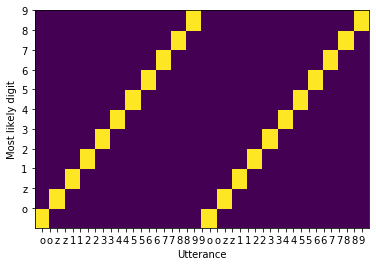

In [71]:

assignments = np.zeros((44, 11))

ass_index = np.argmax(scores_viterbi, axis=1)
print(ass_index)

for i in range(44):
    assignments[i,ass_index[i]] = 1

plt.pcolormesh(assignments.T)
plt.ylabel("Most likely digit")
plt.yticks(range(1,12), labels=labels_hmm)
plt.xlabel("Utterance")
plt.xticks(range(1,44), labels=labels_utterances)
plt.show()

In [35]:
def statePosteriors(log_alpha, log_beta):
    return log_alpha + log_beta - logsumexp(log_alpha[-1,:])

In [42]:
state1 = statePosteriors(forward1, back1)
gmm1 = np.zeros(state1.shape)
HMM = wordHMMs['o']
print(HMM["means"].shape)
gmm1 = log_multivariate_normal_density_diag(
       example['lmfcc'], HMM["means"], HMM["covars"])
for i in range(gmm1.shape[0]):
    # normalize
    gmm1[i, :] = gmm1[i, :] - logsumexp(gmm1[i, :])

(9, 13)


In [43]:
state1

array([[-4.54747351e-12,            -inf,            -inf,
                   -inf,            -inf,            -inf,
                   -inf,            -inf,            -inf],
       [-1.07223989e+00, -4.18916792e-01,            -inf,
                   -inf,            -inf,            -inf,
                   -inf,            -inf,            -inf],
       [-5.59049135e+00, -2.23500866e-01, -1.62682516e+00,
                   -inf,            -inf,            -inf,
                   -inf,            -inf,            -inf],
       [-1.56837031e+01, -4.49281169e-01, -1.01635092e+00,
        -5.38659771e+01,            -inf,            -inf,
                   -inf,            -inf,            -inf],
       [-1.56837032e+01, -1.99722014e+01, -1.56525857e-07,
        -3.46555621e+01, -2.74226944e+02,            -inf,
                   -inf,            -inf,            -inf],
       [-4.22637781e+01, -1.56778558e+01, -1.55313501e-07,
        -2.69980404e+01, -2.51068363e+02, -2.742269

In [44]:
gmm1

array([[-6.67498020e+00, -2.45187134e+00, -8.85262990e-01,
        -1.98668589e+01, -1.25834970e+02, -2.10345610e+01,
        -6.67498020e+00, -2.45187134e+00, -8.85262990e-01],
       [-3.79307239e+00, -3.56855981e+00, -8.00115063e-01,
        -1.72893865e+01, -1.31523125e+02, -2.21075989e+01,
        -3.79307239e+00, -3.56855981e+00, -8.00115063e-01],
       [-6.10699957e+00, -1.91610812e+00, -1.04812649e+00,
        -2.15792796e+01, -1.20935636e+02, -1.50243946e+01,
        -6.10699957e+00, -1.91610812e+00, -1.04812649e+00],
       [-7.30642082e+00, -9.57840767e-01, -2.15754796e+00,
        -2.07824182e+01, -1.27587237e+02, -2.22637112e+01,
        -7.30642082e+00, -9.57840767e-01, -2.15754796e+00],
       [-4.15254959e+00, -2.09507876e+01, -7.25737643e-01,
        -7.39136549e+00, -1.20859250e+02, -1.83190843e+01,
        -4.15254959e+00, -2.09507876e+01, -7.25737643e-01],
       [-5.53959715e+00, -1.63681927e+00, -1.19907309e+00,
        -1.55776156e+01, -1.23918321e+02, -1.446175

In [45]:
print(np.sum(np.exp(state1), axis = 1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
print(np.sum(np.exp(gmm1), axis = 1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


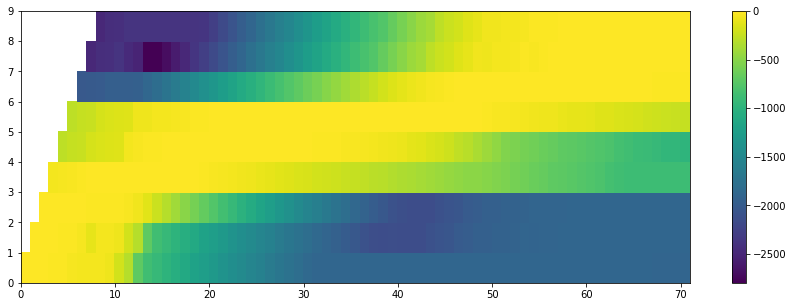

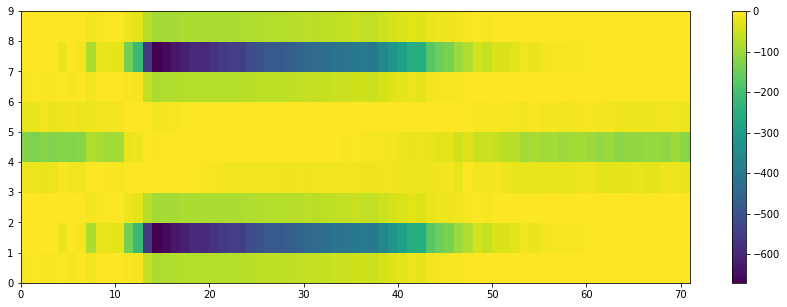

In [47]:
plt.figure(figsize=(15,5))
plt.pcolormesh(state1.T)
plt.colorbar()
plt.show()

plt.figure(figsize=(15,5))
plt.pcolormesh(gmm1.T)
plt.colorbar()
plt.show()

In [48]:
# summing up in the time domain
print(state1.shape)

over_time = np.sum(np.exp(state1), axis=0)
print("sum over time : ", over_time)
print("sum of the sum over time : ", np.sum(over_time))

(71, 9)
sum over time :  [ 1.34597458  2.09555994  3.55849998  9.73752276 10.12040999 20.5329264
 12.9968938   1.20869929  9.40351326]
sum of the sum over time :  70.99999999991068


In [49]:
def updateMeanAndVar(X, log_gamma, varianceFloor=5.0):
    N = X.shape[0]
    M = log_gamma.shape[1]
    D = X.shape[1]
    means  = np.zeros((M, D))
    covars = np.zeros((M, D))

    for i in range(M):
        means[i, :] = np.dot(X.T, np.exp(log_gamma[:, i])) / np.sum(np.exp(log_gamma[:, i]))

        C = X.T - means[i,:].reshape((D, 1))

        res = 0
        for j in range(N):
            res = res + np.exp(log_gamma[j, i]) * np.outer(C[:, j], C[:, j])

        covars[i, :] = np.diag(res) / np.sum(np.exp(log_gamma[:, i]))

    covars[covars < varianceFloor] = varianceFloor

    return means, covars

o


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


z
1
2
3
4
5
6
7
8
9


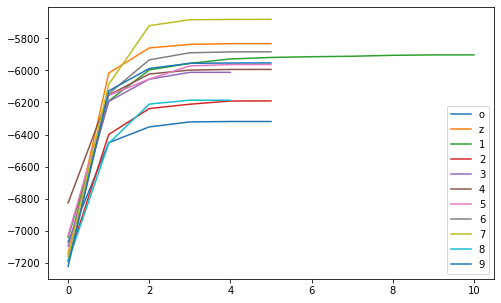

In [74]:
# update mean and variance

data_10 = data[10]
max_iters = 20
j = 0

Lik = np.zeros([max_iters, len(wordHMMsall.keys())])
Lik[:] = np.nan

for key, HMM in wordHMMsall.items():
    print(key)
    means = HMM["means"]
    covars = HMM["covars"]

    log_likelihood = +np.inf
    
    for i in range(max_iters):
        obs_log_lik = log_multivariate_normal_density_diag(data_10["lmfcc"],
                    means,
                    covars)

        forward_prob = forward(obs_log_lik,
                    np.log(HMM["startprob"]),
                    np.log(HMM["transmat"]))

        backward_prob = backward(obs_log_lik,
                np.log(HMM["startprob"]),
                np.log(HMM["transmat"]))

        log_likelihood_new = logsumexp(forward_prob[-1, :])
        Lik[i,j] = log_likelihood_new
        if abs(log_likelihood_new - log_likelihood) < 1:
            break

        log_likelihood = log_likelihood_new

        log_gamma = statePosteriors(forward_prob, backward_prob)

        means, covars = updateMeanAndVar(data_10["lmfcc"], log_gamma, varianceFloor=5.0)

    j += 1

    
plt.figure(figsize=(8,5))
plt.plot(Lik)

plt.legend(labels_hmm)

plt.show()